In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', sep=',', encoding='latin-1')
df.head()

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Let's Select columns which we want to analyze

In [3]:
df = df[['eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','targtype1_txt',
        'gname','weaptype1_txt','dbsource']]

In [4]:
df.shape

(181691, 11)

In [5]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,Unknown,PGIS
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Unknown,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,PGIS


In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
dbsource           0
dtype: int64

In [7]:
df.describe()

,eventid,iyear,imonth,iday
count,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644
std,1.325957e+09,13.259430,3.388303,8.814045
min,1.970000e+11,1970.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000
max,2.017123e+11,2017.000000,12.000000,31.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   country_txt      181691 non-null  object
 5   region_txt       181691 non-null  object
 6   attacktype1_txt  181691 non-null  object
 7   targtype1_txt    181691 non-null  object
 8   gname            181691 non-null  object
 9   weaptype1_txt    181691 non-null  object
 10  dbsource         181691 non-null  object
dtypes: int64(4), object(7)
memory usage: 15.2+ MB


### Sourcewise Terrorist attacks

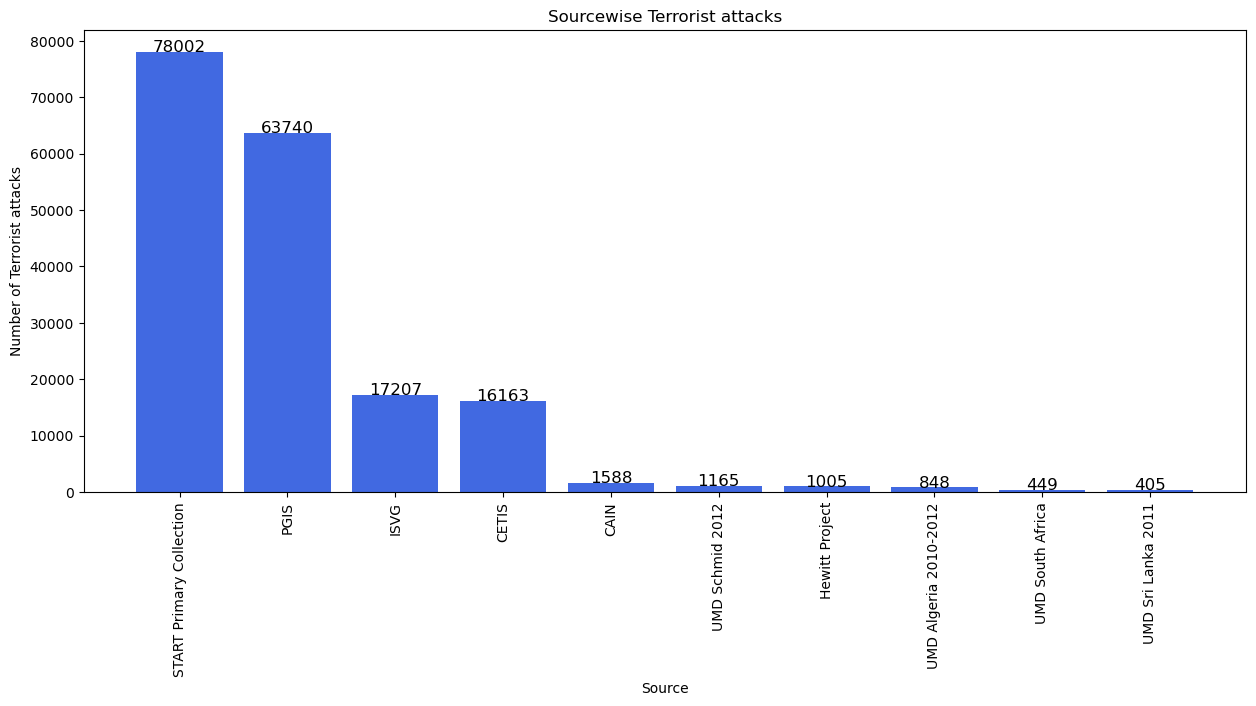

In [9]:
plt.figure(figsize=(15,6))
plt.bar(df.dbsource.value_counts()[:10].index,df.dbsource.value_counts()[:10].values,color='royalblue')
# set the axis labels and title
plt.xlabel('Source')
plt.ylabel('Number of Terrorist attacks')
plt.title('Sourcewise Terrorist attacks')
plt.xticks(rotation=90)
# # rotate the x-axis labels for better visibility
for i, v in enumerate(df.dbsource.value_counts()[:10].values):
    plt.text(df.dbsource.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

### Top 10 Countries with Highest Terrorism

In [10]:
df.country_txt.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

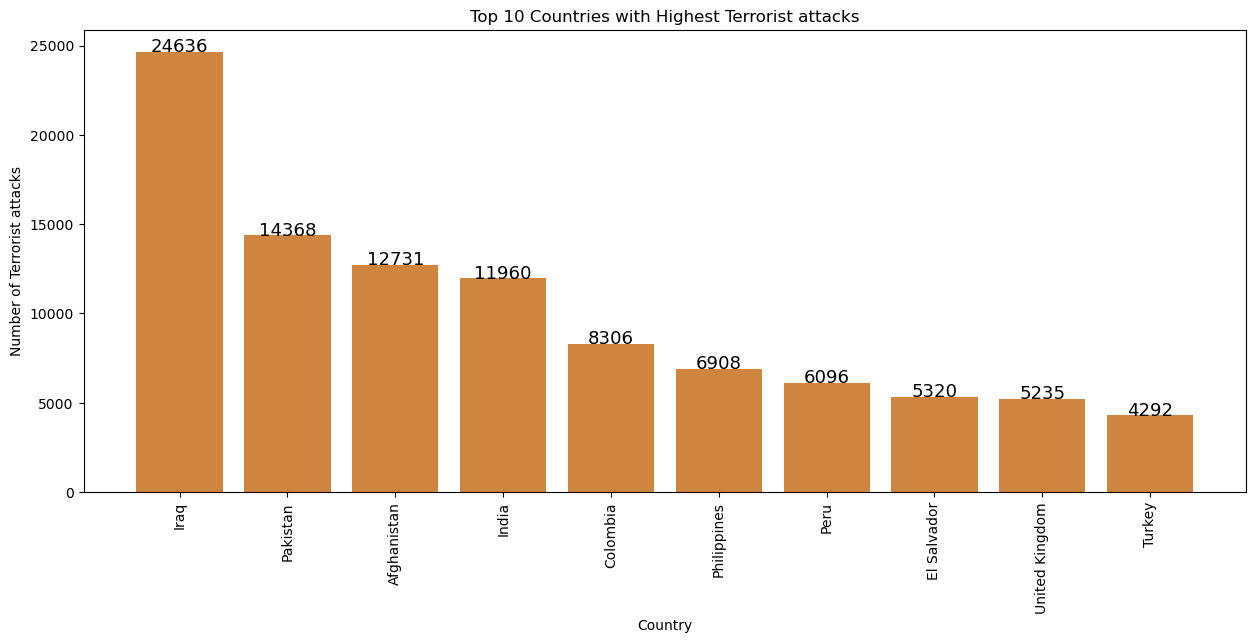

In [11]:
plt.figure(figsize=(15,6))
plt.bar(df.country_txt.value_counts()[:10].index,df.country_txt.value_counts()[:10].values,color='peru')
# set the axis labels and title
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 10 Countries with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.country_txt.value_counts()[:10].values):
    plt.text(df.country_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

### Regions with Highest Terrorist attacks

In [12]:
df.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

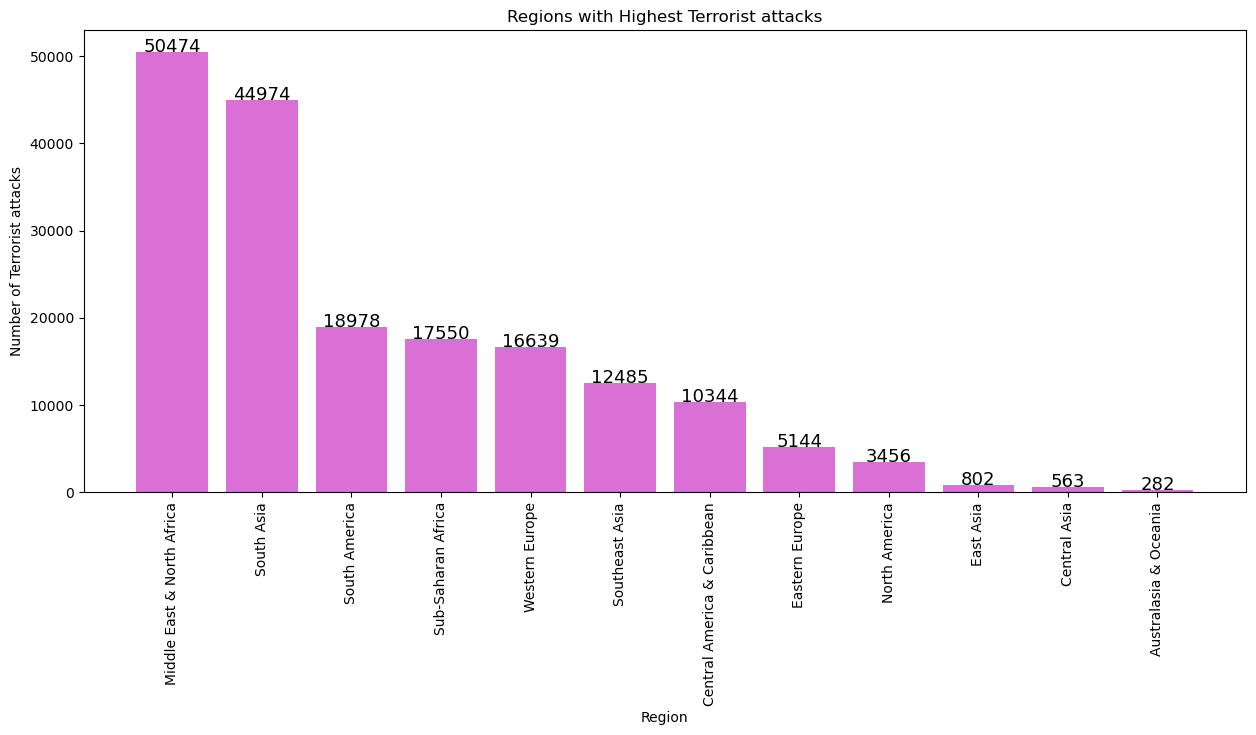

In [13]:
plt.figure(figsize=(15,6))
plt.bar(df.region_txt.value_counts().index,df.region_txt.value_counts().values,color='orchid')
# set the axis labels and title
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.region_txt.value_counts().values):
    plt.text(df.region_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

### Most common types of Terrorist attacks

In [14]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

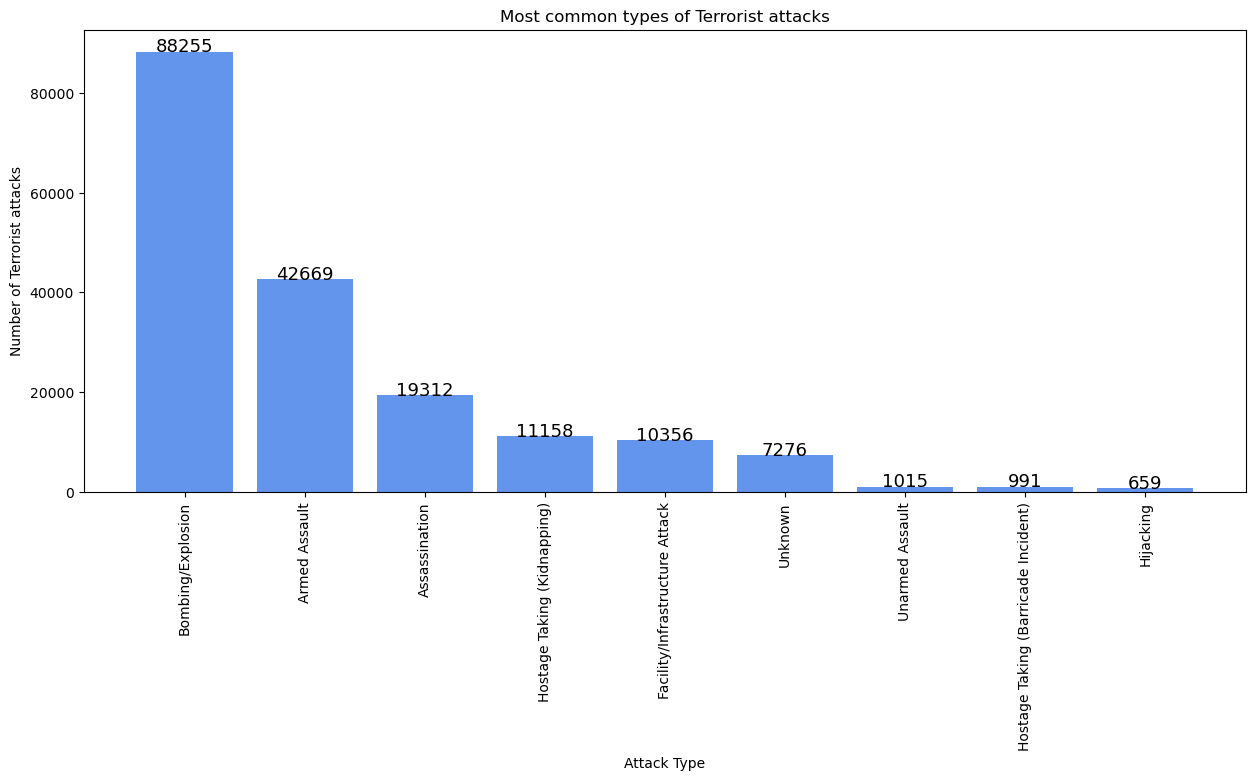

In [15]:
plt.figure(figsize=(15,6))
plt.bar(df.attacktype1_txt.value_counts().index,df.attacktype1_txt.value_counts().values,color='cornflowerblue')
# set the axis labels and title
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.attacktype1_txt.value_counts().values):
    plt.text(df.attacktype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

### Most Targeted Places for Terrorist attacks

In [16]:
df.targtype1_txt.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

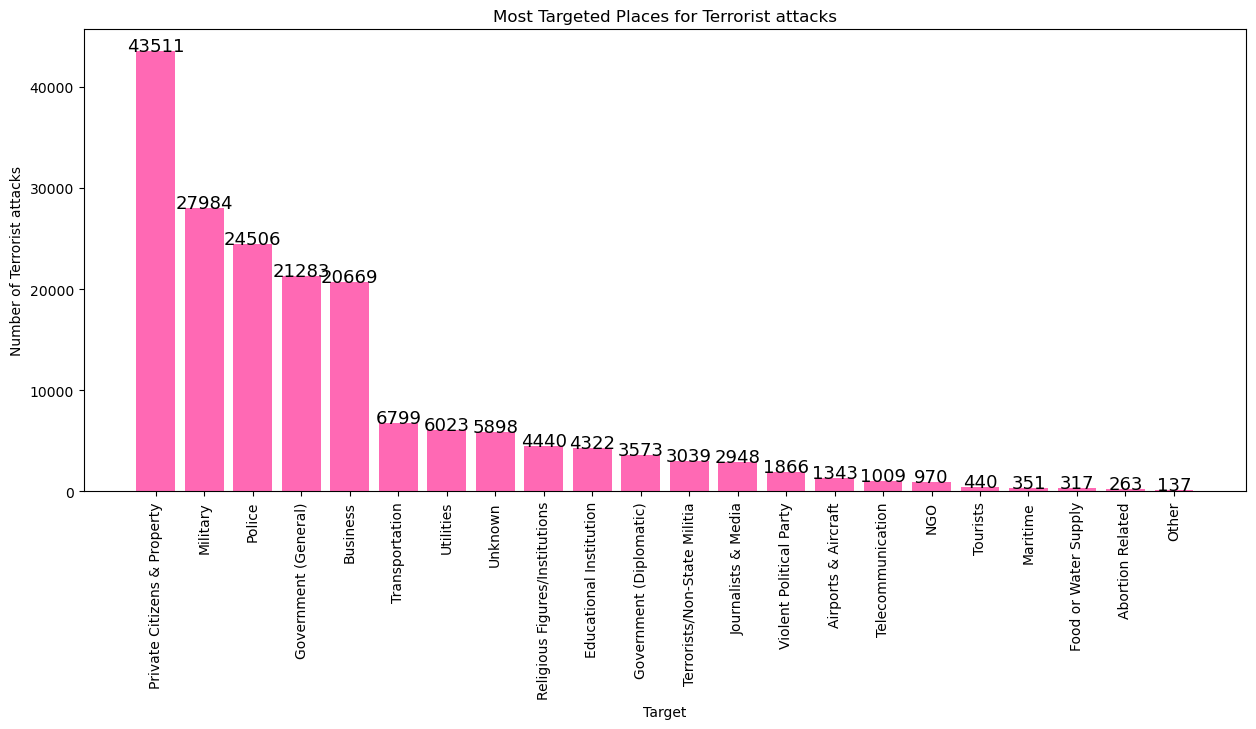

In [17]:
plt.figure(figsize=(15,6))
plt.bar(df.targtype1_txt.value_counts().index,df.targtype1_txt.value_counts().values,color='hotpink')
# set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Targeted Places for Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.targtype1_txt.value_counts().values):
    plt.text(df.targtype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

### Most terrorist attacks by different groups

In [18]:
df.gname.value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

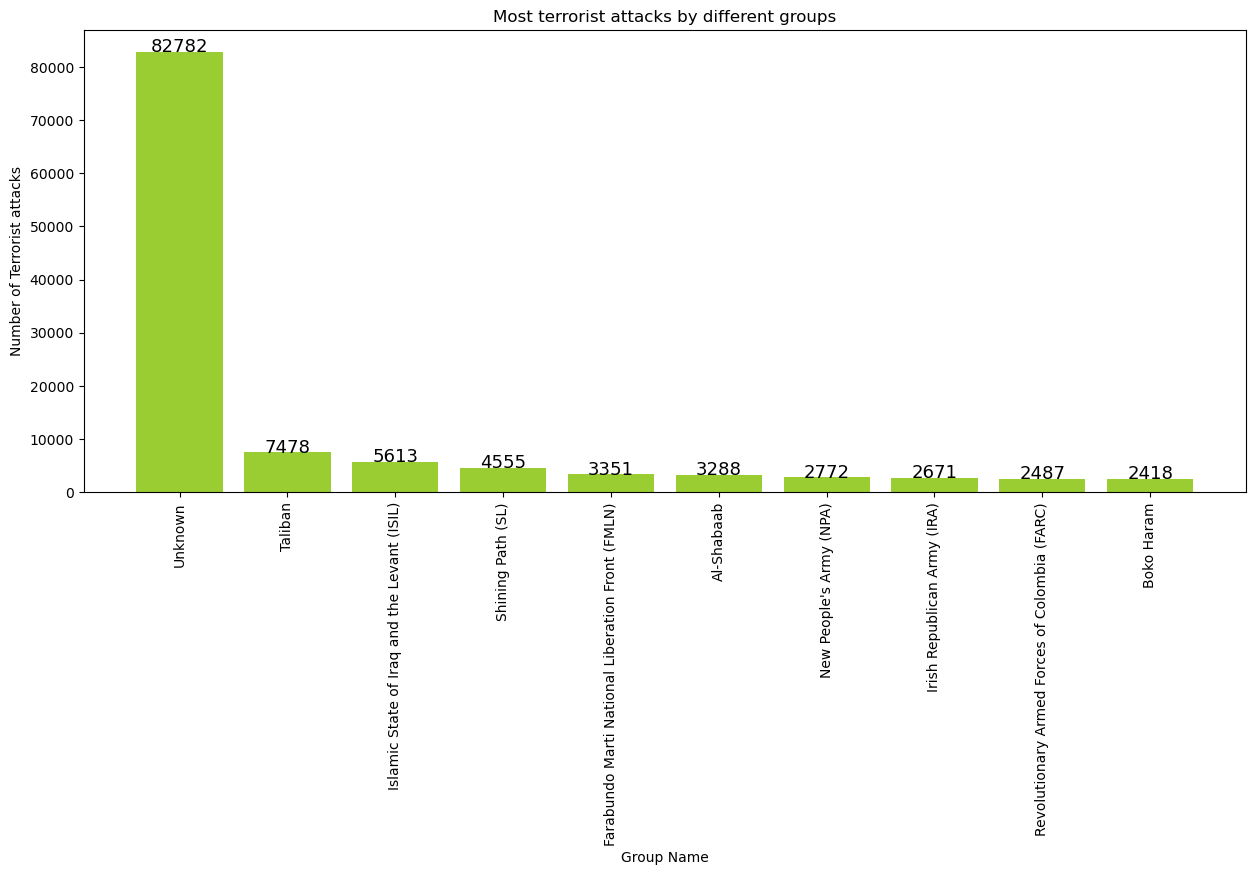

In [19]:
plt.figure(figsize=(15,6))
plt.bar(df.gname.value_counts()[:10].index,df.gname.value_counts()[:10].values,color='yellowgreen')
# set the axis labels and title
plt.xlabel('Group Name')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most terrorist attacks by different groups')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.gname.value_counts()[:10].values):
    plt.text(df.gname.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

### Most types of weapons used in terrorist attacks

In [20]:
df.weaptype1_txt.value_counts()[:10]

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weaptype1_txt, dtype: int64

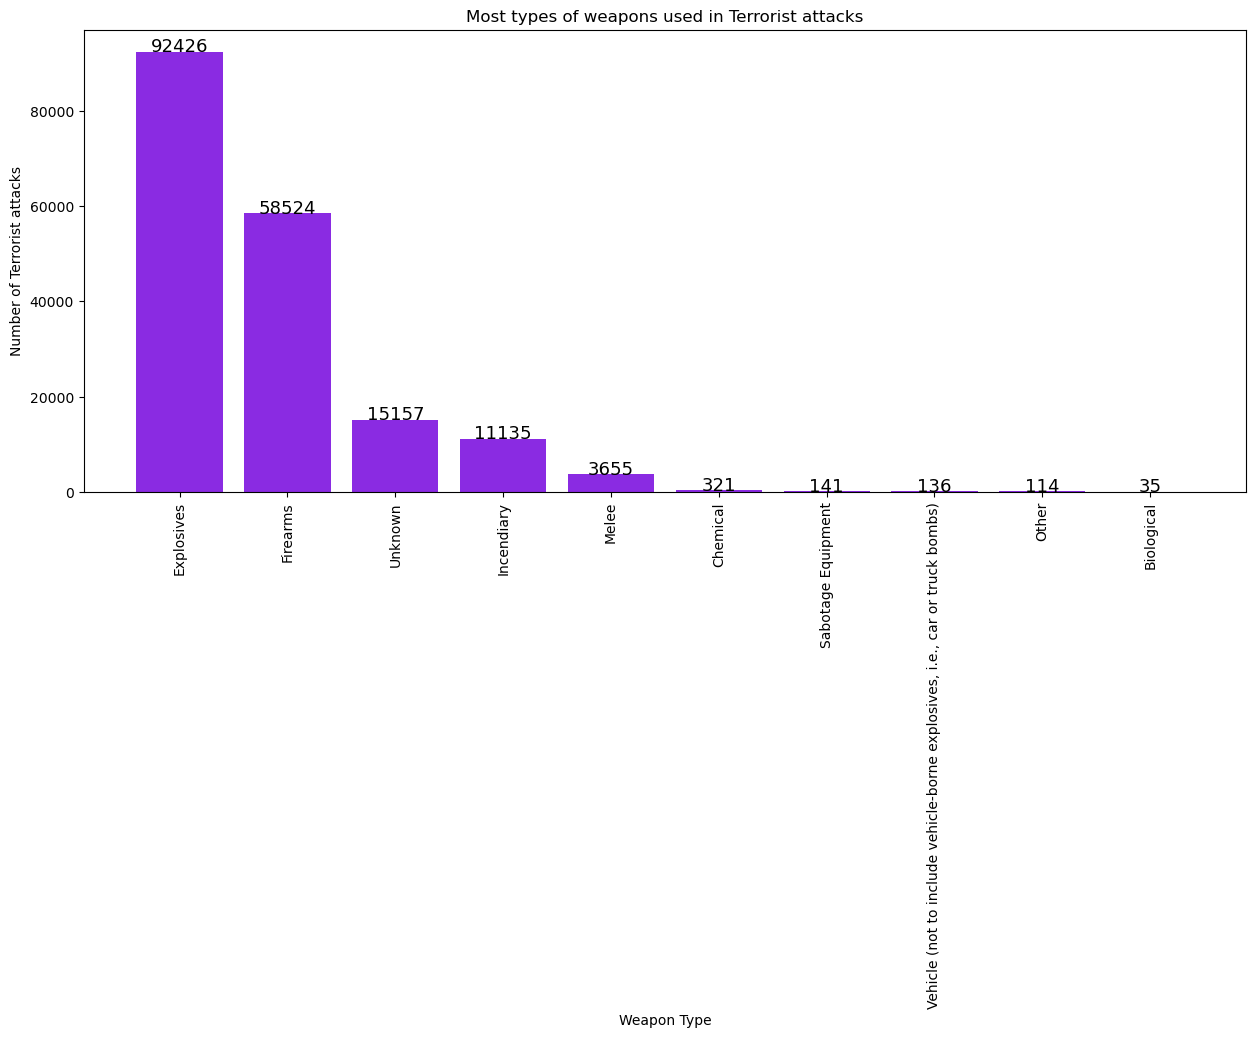

In [21]:
plt.figure(figsize=(15,6))
plt.bar(df.weaptype1_txt.value_counts()[:10].index,df.weaptype1_txt.value_counts()[:10].values,color='blueviolet')
# set the axis labels and title
plt.xlabel('Weapon Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most types of weapons used in Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.weaptype1_txt.value_counts()[:10].values):
    plt.text(df.weaptype1_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

### Terrorism attacks occurred each year

In [22]:
highest_values = df.groupby(['iyear'])['eventid'].count()
highest_values

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: eventid, dtype: int64

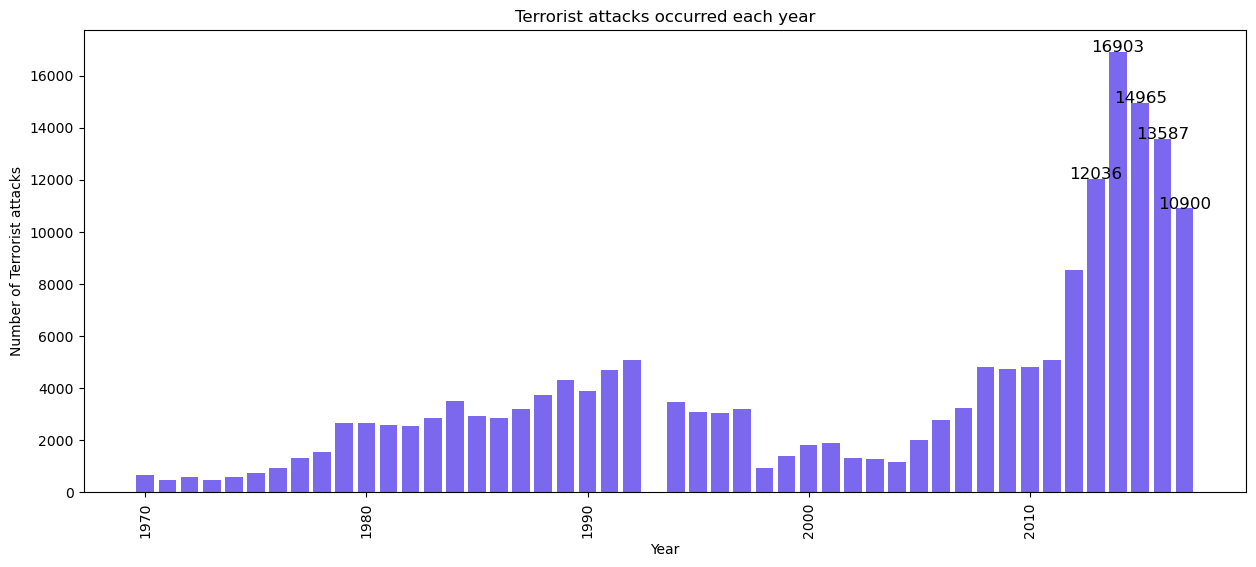

In [23]:
plt.figure(figsize=(15,6))
plt.bar(highest_values.index, highest_values.values,color='mediumslateblue')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occurred each year')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

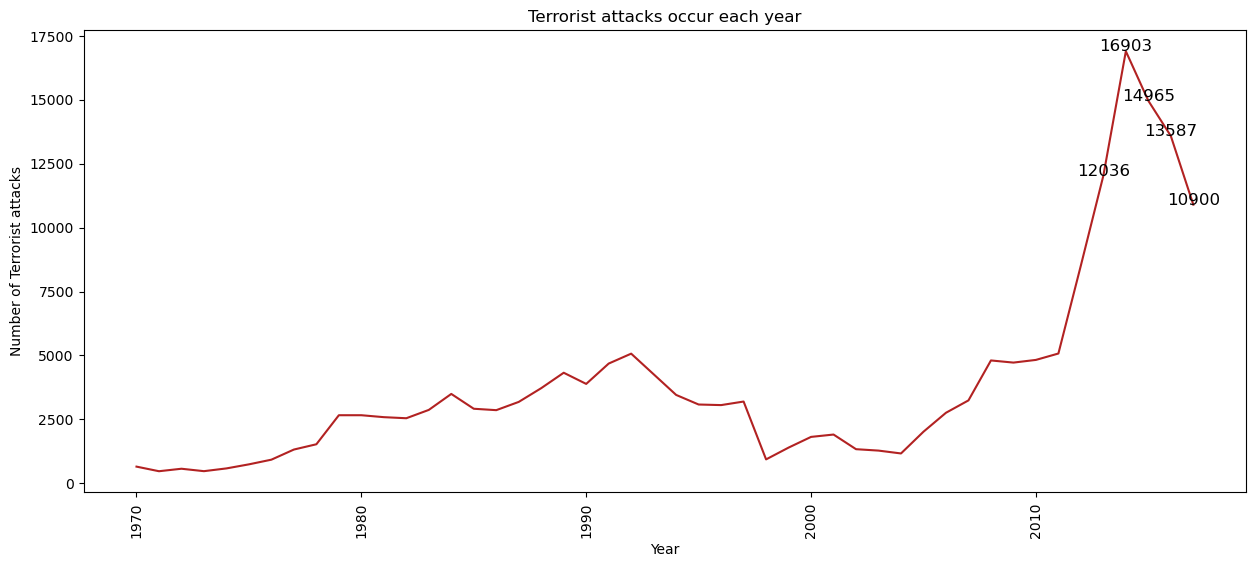

In [24]:
plt.figure(figsize=(15,6))
# plt.bar(highest_values.index, highest_values.values,color='mediumslateblue')
plt.plot(highest_values.index, highest_values.values, color="firebrick")
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occur each year')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')

#### After 2011 there is sudden rise in number of terrorist attacks.

### Compairing terrorist attacks before and after 2011 

In [25]:
new_row = pd.DataFrame(data = {
    'year' : ['Before 2011','After 2011'],
    'value' : [df[df.iyear < 2011].shape[0],df[df.iyear >= 2011].shape[0]]
})
new_row = new_row.set_index('year')
new_row

,value
year,
Before 2011,99702
After 2011,81989


<AxesSubplot:ylabel='value'>

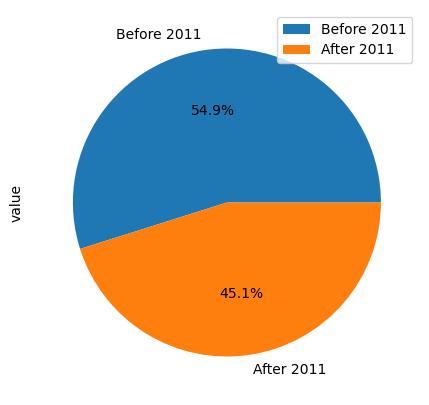

In [26]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

##### Approx 55% terrorist attacks happen before 2011 i.e. of total 40 years but 45% attacks happen after 2011 that too in 7 years.

### Analyzing terrorist attacks after 2011

In [27]:
df_after_2011 = df[df.iyear > 2011]
df_after_2011.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
104778,201201010001,2012,1,1,Pakistan,South Asia,Bombing/Explosion,Business,Unknown,Explosives,START Primary Collection
104779,201201010002,2012,1,1,Kenya,Sub-Saharan Africa,Armed Assault,Business,Al-Shabaab,Explosives,START Primary Collection
104780,201201010003,2012,1,1,Pakistan,South Asia,Bombing/Explosion,Military,Baloch Republican Army (BRA),Explosives,START Primary Collection
104781,201201010004,2012,1,1,Kenya,Sub-Saharan Africa,Armed Assault,Business,Al-Shabaab,Explosives,START Primary Collection
104782,201201010005,2012,1,1,Pakistan,South Asia,Hostage Taking (Kidnapping),Private Citizens & Property,Unknown,Firearms,START Primary Collection


In [28]:
df_after_2011.region_txt.value_counts()[:10]

Middle East & North Africa    29839
South Asia                    25067
Sub-Saharan Africa            10499
Southeast Asia                 6026
Eastern Europe                 2228
Western Europe                 1566
South America                  1105
North America                   342
East Asia                       105
Central Asia                     62
Name: region_txt, dtype: int64

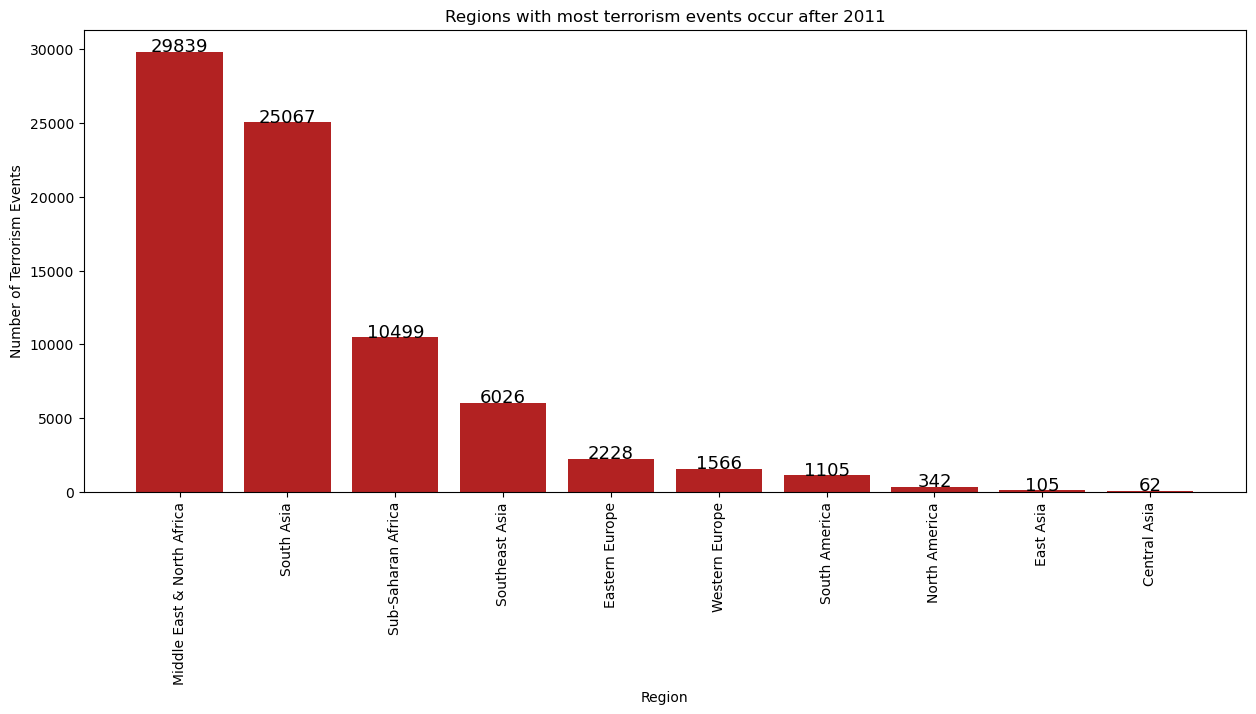

In [29]:
plt.figure(figsize=(15,6))
plt.bar(df_after_2011.region_txt.value_counts()[:10].index,df_after_2011.region_txt.value_counts()[:10].values,color='firebrick')
# set the axis labels and title
plt.xlabel('Region')
plt.ylabel('Number of Terrorism Events')
plt.title('Regions with most terrorism events occur after 2011')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df_after_2011.region_txt.value_counts()[:10].values):
    plt.text(df_after_2011.region_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [30]:
new_row = pd.DataFrame(data = {
    'region' : ['Middle East & North Africa','South Asia','Other Regions'],
    'value' : [df_after_2011[df_after_2011.region_txt == 'Middle East & North Africa'].shape[0],df_after_2011[df_after_2011.region_txt == 'South Asia'].shape[0],df_after_2011[(df_after_2011.region_txt != 'South Asia') & (df_after_2011.region_txt != 'Middle East & North Africa')].shape[0]]
})
new_row = new_row.set_index('region')
new_row

,value
region,
Middle East & North Africa,29839
South Asia,25067
Other Regions,22007


<AxesSubplot:ylabel='value'>

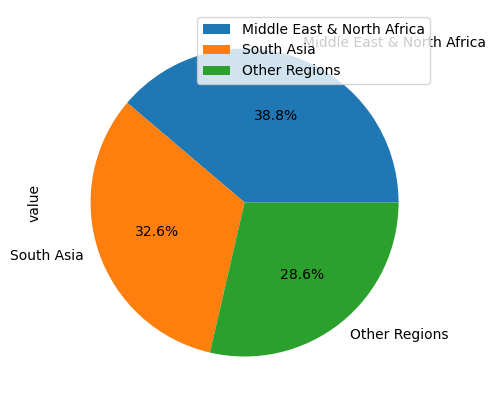

In [31]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'region', autopct='%1.1f%%')

##### After 2011, more than 71% terrorist attacks occurred in Middle East & North Africa and South Asia combining these two regions.

#### Analyzing Middle East & North Africa region after 2011

In [32]:
df_region_after_2011 = df_after_2011[df_after_2011.region_txt == 'Middle East & North Africa']
df_region_after_2011.country_txt.value_counts()[:10]

Iraq                        16799
Yemen                        2915
Libya                        2231
Syria                        2003
Egypt                        1971
Turkey                       1469
West Bank and Gaza Strip      706
Israel                        535
Lebanon                       448
Saudi Arabia                  307
Name: country_txt, dtype: int64

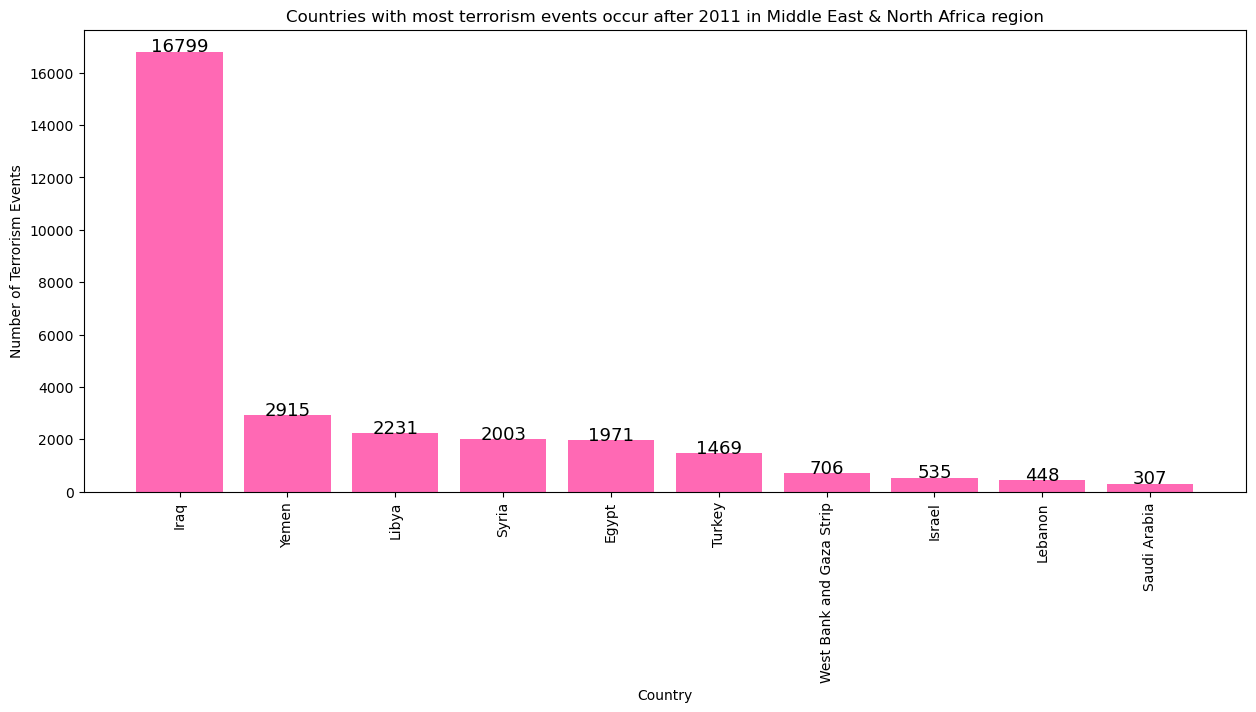

In [33]:
plt.figure(figsize=(15,6))
plt.bar(df_region_after_2011.country_txt.value_counts()[:10].index,df_region_after_2011.country_txt.value_counts()[:10].values,color='hotpink')
# set the axis labels and title
plt.xlabel('Country')
plt.ylabel('Number of Terrorism Events')
plt.title('Countries with most terrorism events occur after 2011 in Middle East & North Africa region')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df_region_after_2011.country_txt.value_counts()[:10].values):
    plt.text(df_region_after_2011.country_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [34]:
new_row = pd.DataFrame(data = {
    'country' : ['Iraq','Other countries'],
    'value' : [df_region_after_2011.country_txt.value_counts()[0],df_region_after_2011.country_txt.value_counts().values[1:].sum()]
})
new_row = new_row.set_index('country')
new_row

,value
country,
Iraq,16799
Other countries,13040


<AxesSubplot:ylabel='value'>

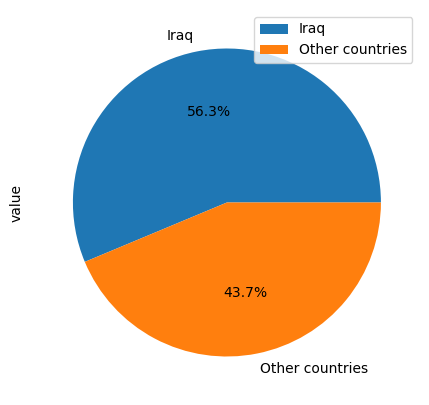

In [35]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

##### After 2011, in  Middle East & North Africa region more than 56% terrorist attacks faced by Iraq alone.

#### Analyzing Iraq after 2011¶

In [36]:
iraq_after_2011 = df_region_after_2011[df_region_after_2011.country_txt == 'Iraq']
iraq_after_2011.targtype1_txt.value_counts()[:10]

Private Citizens & Property       6031
Military                          2840
Police                            2426
Business                          1472
Unknown                           1248
Government (General)               961
Terrorists/Non-State Militia       689
Religious Figures/Institutions     321
Transportation                     236
Utilities                          235
Name: targtype1_txt, dtype: int64

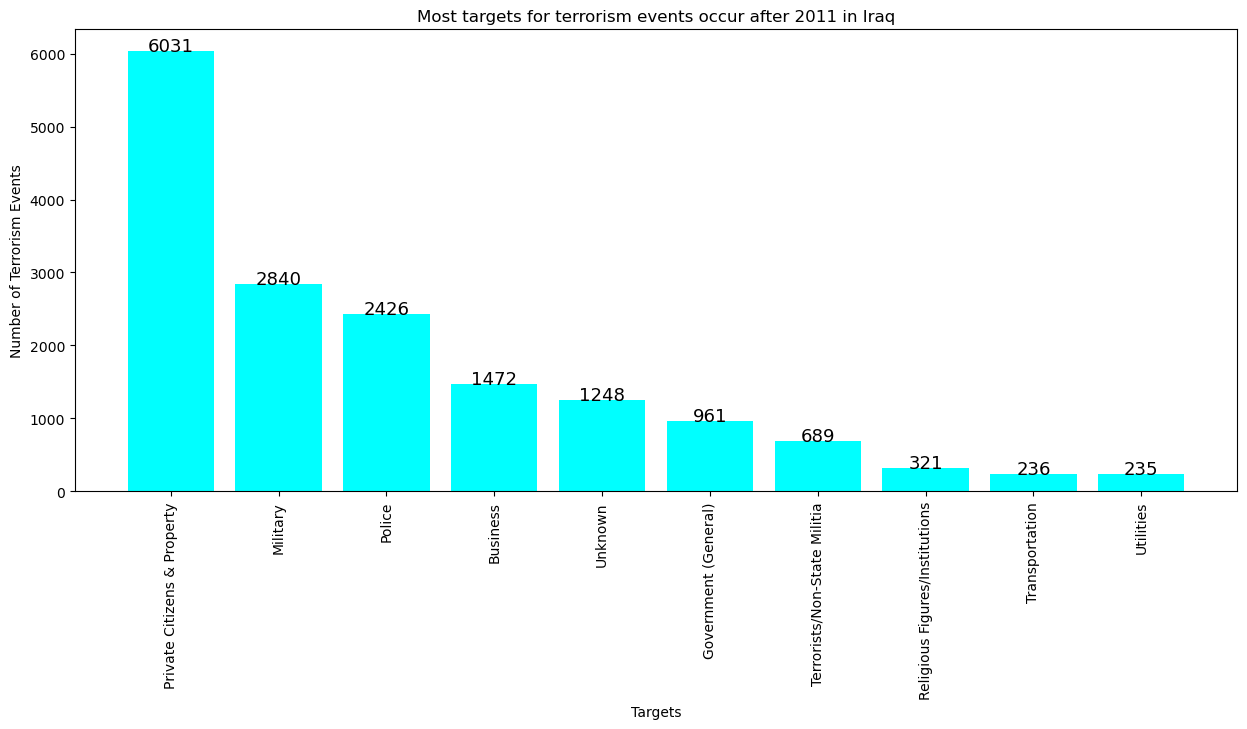

In [37]:
plt.figure(figsize=(15,6))
plt.bar(iraq_after_2011.targtype1_txt.value_counts()[:10].index,iraq_after_2011.targtype1_txt.value_counts()[:10].values,color='cyan')
# set the axis labels and title
plt.xlabel('Targets')
plt.ylabel('Number of Terrorism Events')
plt.title('Most targets for terrorism events occur after 2011 in Iraq')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(iraq_after_2011.targtype1_txt.value_counts()[:10].values):
    plt.text(iraq_after_2011.targtype1_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [38]:
new_row = pd.DataFrame(data = {
    'target' : ['Private Citizens & Property','Other Targets'],
    'value' : [iraq_after_2011[iraq_after_2011.targtype1_txt == 'Private Citizens & Property'].shape[0],iraq_after_2011[iraq_after_2011.country_txt != 'Private Citizens & Property'].shape[0]]
})
new_row = new_row.set_index('target')
new_row

,value
target,
Private Citizens & Property,6031
Other Targets,16799


<AxesSubplot:ylabel='value'>

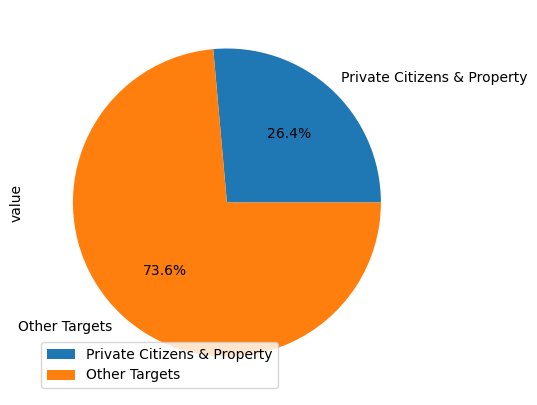

In [39]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'target', autopct='%1.1f%%')

##### After 2011, in Iraq more than 26% terrorist attack targets were Private Citizens & Property.

In [40]:
iraq_after_2011_target = iraq_after_2011[iraq_after_2011.targtype1_txt == "Private Citizens & Property"]
iraq_after_2011_target.attacktype1_txt.value_counts()[:10]

Bombing/Explosion                      5098
Hostage Taking (Kidnapping)             336
Unknown                                 254
Armed Assault                           246
Assassination                            64
Facility/Infrastructure Attack           28
Hostage Taking (Barricade Incident)       2
Hijacking                                 2
Unarmed Assault                           1
Name: attacktype1_txt, dtype: int64

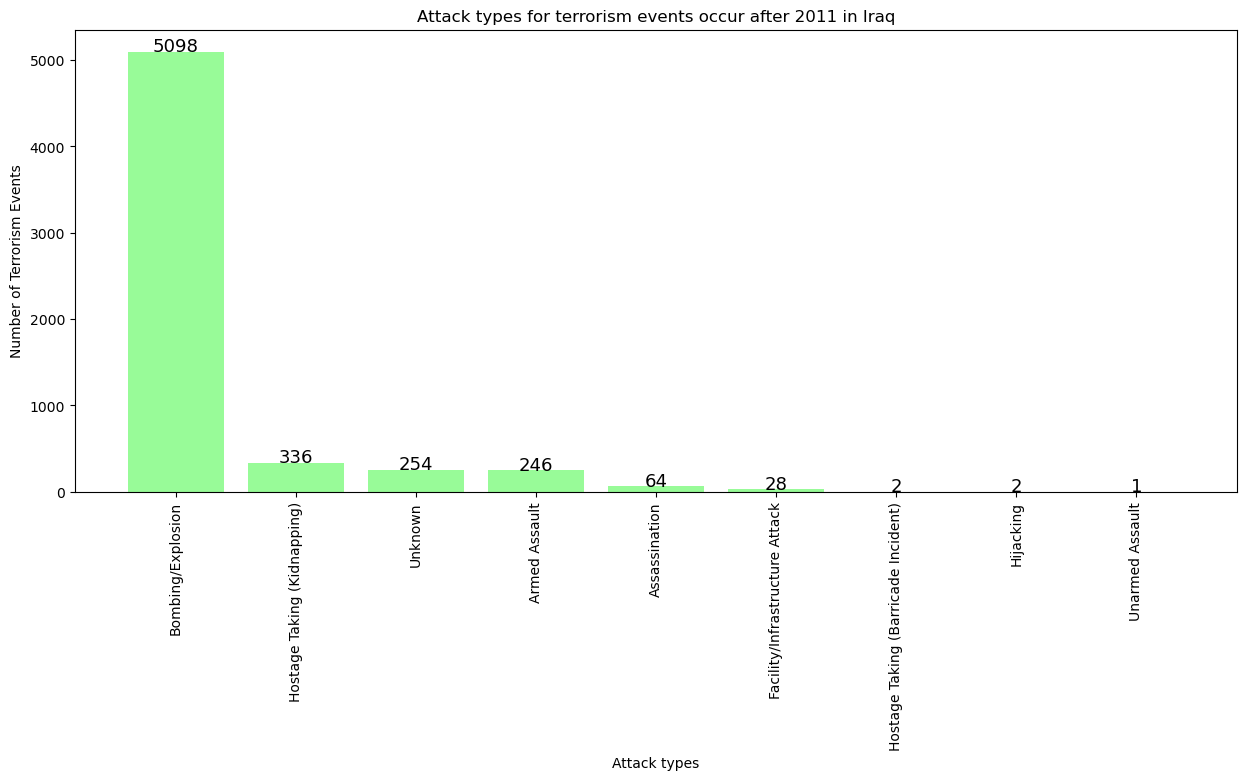

In [41]:
plt.figure(figsize=(15,6))
plt.bar(iraq_after_2011_target.attacktype1_txt.value_counts()[:10].index,iraq_after_2011_target.attacktype1_txt.value_counts()[:10].values,color='palegreen')
# set the axis labels and title
plt.xlabel('Attack types')
plt.ylabel('Number of Terrorism Events')
plt.title('Attack types for terrorism events occur after 2011 in Iraq')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(iraq_after_2011_target.attacktype1_txt.value_counts()[:10].values):
    plt.text(iraq_after_2011_target.attacktype1_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [42]:
new_row = pd.DataFrame(data = {
    'attacktype' : ['Bombing/Explosion','Other Attack Types'],
    'value' : [iraq_after_2011_target[iraq_after_2011_target.attacktype1_txt == 'Bombing/Explosion'].shape[0],iraq_after_2011_target[iraq_after_2011_target.attacktype1_txt != 'Bombing/Explosion'].shape[0]]
})
new_row = new_row.set_index('attacktype')
new_row

,value
attacktype,
Bombing/Explosion,5098
Other Attack Types,933


<AxesSubplot:ylabel='value'>

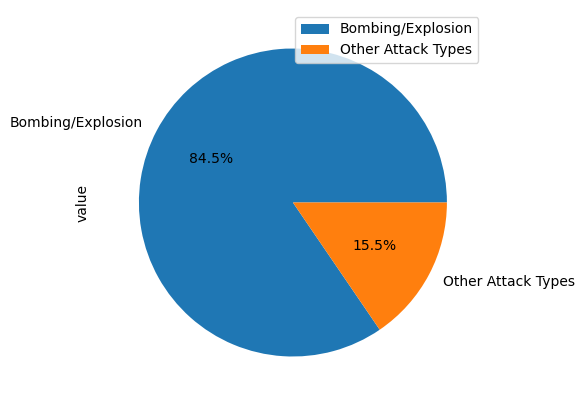

In [43]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'attacktype', autopct='%1.1f%%')

##### After 2011, in Iraq more than 84% terrorist attack types were Bombing/Explosion to kill citizens and affect the properties.

### Lets Compare Terrorism from India and Pakistan

In [44]:
df_india = df[df.country_txt == 'India']
df_india.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
1186,197202220004,1972,2,22,India,South Asia,Hijacking,Airports & Aircraft,Palestinians,Explosives,Hijacking DB
2764,197501190004,1975,1,2,India,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Explosives,UMD Encyclopedia of World Terrorism 2012
3857,197605260001,1976,5,26,India,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
5327,197709280004,1977,9,28,India,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,Hijacking DB
7337,197901130004,1979,1,13,India,South Asia,Armed Assault,Police,Naga People,Firearms,PGIS


In [45]:
df_pakistan = df[df.country_txt == 'Pakistan']
df_pakistan.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
585,197011010001,1970,11,1,Pakistan,South Asia,Assassination,Government (Diplomatic),Unknown,Vehicle (not to include vehicle-borne explosiv...,PGIS
2217,197402020001,1974,2,2,Pakistan,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Firearms,PGIS
2705,197412090001,1974,12,9,Pakistan,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
2744,197500000001,1975,0,0,Pakistan,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
2795,197502080001,1975,2,8,Pakistan,South Asia,Assassination,Government (General),National Awami Party,Firearms,PGIS


In [46]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_india.shape[0],df_pakistan.shape[0],df[(df.region_txt == 'South Asia') & (df.country_txt != 'India') & (df.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,11960
Pakistan,14368
Other Countries,18646


<AxesSubplot:ylabel='value'>

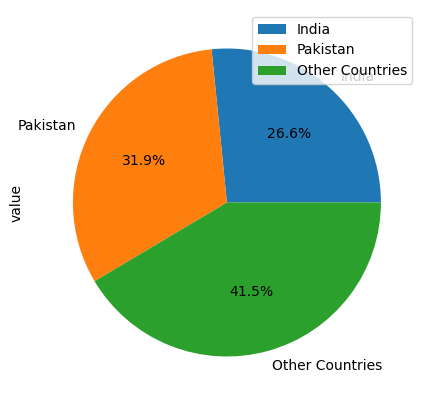

In [47]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

##### More than 58% terrorist attacks from South Asia are from India and Pakistan only. 

In [48]:
india_year_wise_values = df_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values

iyear
1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: eventid, dtype: int64

In [49]:
pakistan_year_wise_values = df_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values

iyear
1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013    2215
2014    2151
2015    1243
2016     864
2017     719
Name: eventid, dtype: int64

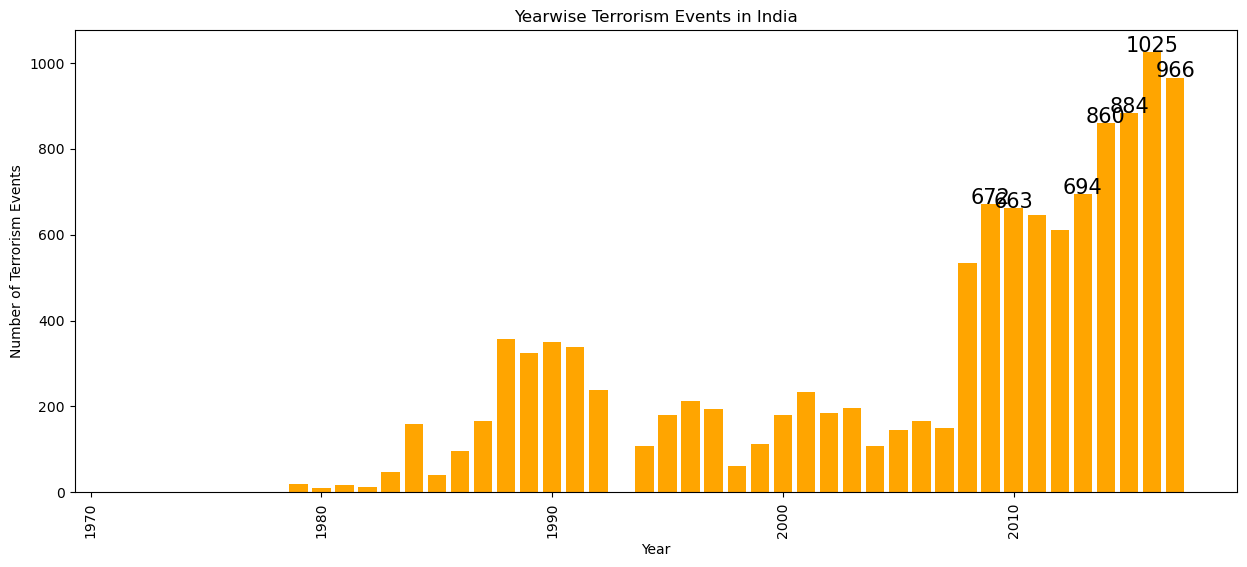

In [50]:
plt.figure(figsize=(15,6))
plt.bar(india_year_wise_values.index, india_year_wise_values.values,color='orange')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(india_year_wise_values.values):
    if v > 650:
        plt.text(india_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
# show the plot
plt.show()

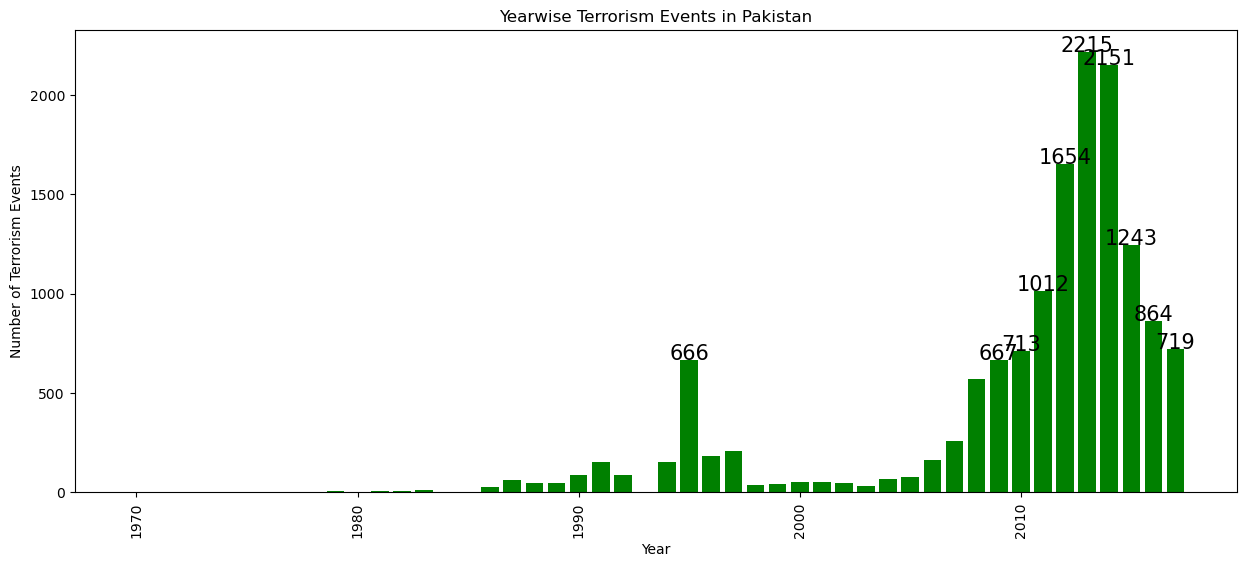

In [51]:
plt.figure(figsize=(15,6))
plt.bar(pakistan_year_wise_values.index, pakistan_year_wise_values.values,color='g')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in Pakistan')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(pakistan_year_wise_values.values):
    if v > 650:
        plt.text(pakistan_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
# show the plot
plt.show()

In [52]:
df_india_pakistan = pd.DataFrame({'India': india_year_wise_values, 'Pakistan': pakistan_year_wise_values})
df_india_pakistan.head()

,India,Pakistan
iyear,,
1970,NaN,1.0
1972,1.0,NaN
1974,NaN,2.0
1975,1.0,2.0
1976,1.0,3.0


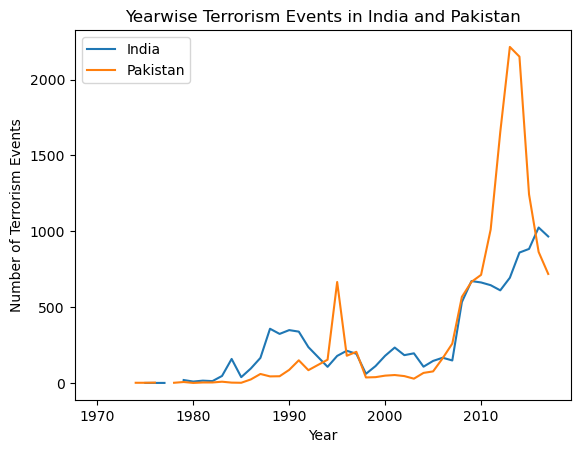

In [53]:
df_india_pakistan.plot()
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India and Pakistan')
plt.legend()
plt.show()

##### In India, there are some moderate number of attacks around 1990's but after 2007 attacks started rising and after 2011 they kept inrcreasing year by year

##### In Pakistan, there is spike in 1995 for number of terrorist attacks, but 2013 and 2014 year was the highest peak where count went more than 2000.

In [54]:
df_before_2011 = df[df.iyear < 2011]

In [55]:
df_after_2011 = df[df.iyear >= 2011]

In [56]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_before_2011[df_before_2011.country_txt == "India"].shape[0],df_before_2011[df_before_2011.country_txt == "Pakistan"].shape[0],df_before_2011[(df_before_2011.region_txt == 'South Asia') & (df_before_2011.country_txt != 'India') & (df_before_2011.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,6275
Pakistan,4510
Other Countries,6984


<AxesSubplot:ylabel='value'>

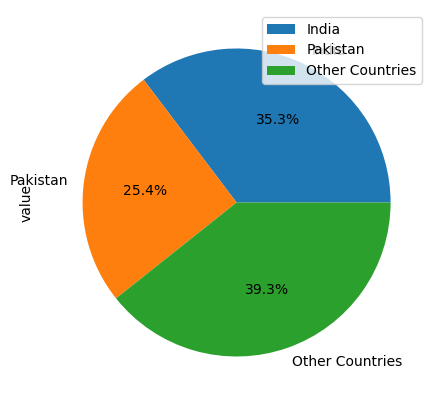

In [57]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

In [58]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_after_2011[df_after_2011.country_txt == "India"].shape[0],df_after_2011[df_after_2011.country_txt == "Pakistan"].shape[0],df_after_2011[(df_after_2011.region_txt == 'South Asia') & (df_after_2011.country_txt != 'India') & (df_after_2011.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,5685
Pakistan,9858
Other Countries,11662


<AxesSubplot:ylabel='value'>

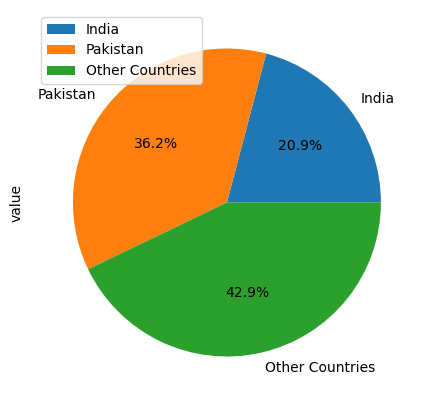

In [59]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

##### When compairing before and after 2011 terrorist attacks, we observed for India percentage of attack reduced from 35% to 21% while for Pakistan percentage of attack increased from 39% to 43%.  

In [60]:
df_india.targtype1_txt.value_counts()[:10]

Private Citizens & Property       3144
Police                            2299
Government (General)              1727
Business                          1131
Military                           916
Transportation                     831
Unknown                            598
Educational Institution            297
Violent Political Party            234
Religious Figures/Institutions     214
Name: targtype1_txt, dtype: int64

In [61]:
df_pakistan.targtype1_txt.value_counts()[:10]

Private Citizens & Property       3456
Police                            1915
Military                          1730
Government (General)              1167
Business                          1165
Educational Institution            953
Unknown                            829
Transportation                     687
Utilities                          636
Religious Figures/Institutions     545
Name: targtype1_txt, dtype: int64

In [62]:
df_india.attacktype1_txt.value_counts()[:10]

Bombing/Explosion                      4825
Armed Assault                          3184
Assassination                          1229
Hostage Taking (Kidnapping)            1184
Facility/Infrastructure Attack          996
Unknown                                 312
Unarmed Assault                         143
Hostage Taking (Barricade Incident)      44
Hijacking                                43
Name: attacktype1_txt, dtype: int64

In [63]:
df_pakistan.attacktype1_txt.value_counts()[:10]

Bombing/Explosion                      7613
Armed Assault                          3859
Assassination                          1406
Hostage Taking (Kidnapping)             823
Facility/Infrastructure Attack          300
Unknown                                 236
Unarmed Assault                          77
Hostage Taking (Barricade Incident)      35
Hijacking                                19
Name: attacktype1_txt, dtype: int64

In [64]:
df_india.gname.value_counts()[:10]

Unknown                                           4263
Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Garo National Liberation Army                      166
Muslim Separatists                                 118
Name: gname, dtype: int64

In [65]:
df_pakistan.gname.value_counts()[:10]

Unknown                                  10891
Tehrik-i-Taliban Pakistan (TTP)           1335
Baloch Republican Army (BRA)               312
Baloch Liberation Front (BLF)              185
Baloch Liberation Army (BLA)               181
Muttahida Qami Movement (MQM)              174
Lashkar-e-Jhangvi                          135
Lashkar-e-Islam (Pakistan)                 124
Khorasan Chapter of the Islamic State       96
United Baloch Army (UBA)                    89
Name: gname, dtype: int64

##### Regarding factors like target type,attack type and gang name India and Pakistan have same elements for terrorist attacks such as Private Citizens & Property mostly targeted and attack is being done with Bombing/Explosion most of the times. And many of gang names for such attacks are Unknown. 